In [5]:
from urllib.request import Request, urlopen
import random
import time
from bs4 import BeautifulSoup

In [7]:

for y in range(2000, 2021, 1):
    
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    
    url ='https://www.basketball-reference.com/teams/LAL/'+str(y)+'_games.html'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    
    filename = 'Lakers/' + str(y)+'.html'
    f = open(filename, 'w')
    f.write(html.decode('utf-8'))
    f.close()
    print('download from:', url)
    
    

Sleep for  4.331573018386618  seconds
download from: https://www.basketball-reference.com/teams/LAL/2000_games.html
Sleep for  0.020244052882746888  seconds
download from: https://www.basketball-reference.com/teams/LAL/2001_games.html
Sleep for  4.106793855062315  seconds
download from: https://www.basketball-reference.com/teams/LAL/2002_games.html
Sleep for  3.7625543637614483  seconds
download from: https://www.basketball-reference.com/teams/LAL/2003_games.html
Sleep for  4.731290449211864  seconds
download from: https://www.basketball-reference.com/teams/LAL/2004_games.html
Sleep for  0.5930291271582327  seconds
download from: https://www.basketball-reference.com/teams/LAL/2005_games.html
Sleep for  1.7819259125840858  seconds
download from: https://www.basketball-reference.com/teams/LAL/2006_games.html
Sleep for  3.942654443124315  seconds
download from: https://www.basketball-reference.com/teams/LAL/2007_games.html
Sleep for  4.495303766345238  seconds
download from: https://www.b

In [8]:
#I collected game logs of all the games played by 2020 NBA Champions, the Los Angeles Lakers, since 2000. 
#Implementation was as simple as reading in the url and saving it somewhere else.

In [9]:
#Next came parsing the website for data

In [11]:


laker_points = []
opponent_points = []
total_points = []


for y in range(2010, 2021, 1):
    filein = 'Lakers/' + str(y) + '.html'
    
    soup = BeautifulSoup(open(filein), 'lxml')



    rows = soup.find_all('tr', attrs={'class' : ''})
    

    for row in rows:
        columns = row.find_all('td')
        if len(columns) >10 :            
            laker_score = columns[8].get_text()
            laker_points.append(int(laker_score))
            
            opponent_score = columns[9].get_text()
            opponent_points.append(int(opponent_score))
            
            total = laker_score + opponent_score
            total_points.append(total)
        

In [12]:
#Finally turning the data into graphs

alpha :  59.45247099858671
beta :  0.43638295490104034
correlation coefficient :  0.4104525308582993


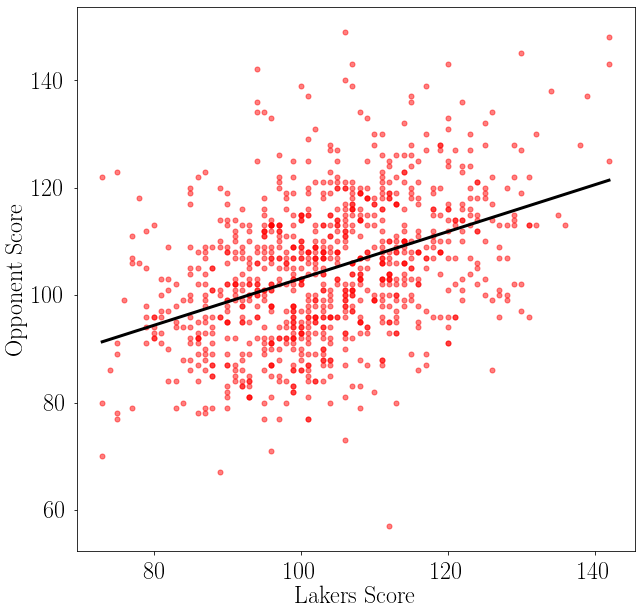

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import stats


slope, intercept, r_value, p_value, std_err = stats.linregress(laker_points,opponent_points)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)



plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8




plt.xlabel('Lakers Score')
plt.ylabel('Opponent Score')


plt.plot(laker_points,opponent_points,marker='o', color ='red', markersize=5, alpha=0.5, linewidth=0)

best_fit_x = np.arange(min(laker_points), max(laker_points), (max(laker_points) - min(laker_points)) / 1000.0)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='black', markersize=0, linewidth=3, linestyle='-', alpha = 1.0)



plt.show()

# Description: 
While the correlation is low, this scatter plot shows that when Lakers' scores are higher,
their opponents' scores are higher as well

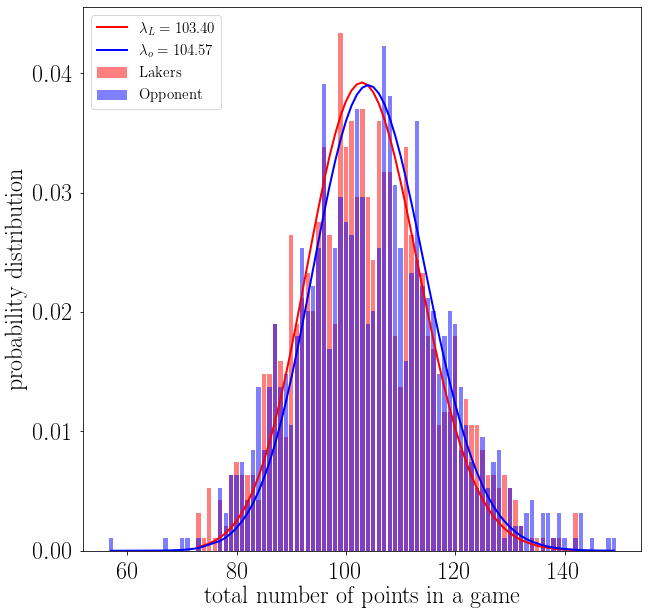

In [17]:
from scipy.stats import poisson
def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance

pdf_h, av_h, var_h = measure_probability_distribution (laker_points)
pdf_v, av_v, var_v = measure_probability_distribution (opponent_points)






plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('total number of points in a game')
plt.ylabel('probability distribution')


x = []
Px = []
for q in pdf_h:
    x.append(q)
    Px.append(pdf_h[q])
    

plt.bar(x, Px, color = 'red', align='center', alpha=0.5, label = 'Lakers')
plt.plot(sorted(x), poisson.pmf(sorted(x), av_h), linestyle='-', linewidth=2.0, color='red', label = '$\lambda_{L} = '+'%.2f' % av_h+'$')





x = []
Px = []
for q in pdf_v:
    x.append(q)
    Px.append(pdf_v[q])
    

plt.bar(x, Px, color = 'blue', align='center', alpha=0.5, label = 'Opponent')
plt.plot(sorted(x), poisson.pmf(sorted(x), av_v), linestyle='-', linewidth=2.0, color='blue', label = '$\lambda_{o} = '+'%.2f' % av_v+'$')


plt.legend(loc=2, numpoints=1, prop={'size':15})

plt.show()

# Description 
The distributions are well fitted by Poisson distributions. On average, Lakers score around 103.4 points per game, 
while their opponents have scored 104.6 points per game since 2010.

In [18]:
for y in range(2000, 2021, 1):
    
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    
    url ='https://www.basketball-reference.com/teams/CHI/'+str(y)+'_games.html'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    
    filename = 'Bulls/' + str(y)+'.html'
    f = open(filename, 'w')
    f.write(html.decode('utf-8'))
    f.close()
    print('download from:', url)

Sleep for  2.9560938785055653  seconds
download from: https://www.basketball-reference.com/teams/CHI/2000_games.html
Sleep for  1.3769340989293577  seconds
download from: https://www.basketball-reference.com/teams/CHI/2001_games.html
Sleep for  3.3219931766126205  seconds
download from: https://www.basketball-reference.com/teams/CHI/2002_games.html
Sleep for  1.537456866544351  seconds
download from: https://www.basketball-reference.com/teams/CHI/2003_games.html
Sleep for  2.658776646574866  seconds
download from: https://www.basketball-reference.com/teams/CHI/2004_games.html
Sleep for  0.6649007945206509  seconds
download from: https://www.basketball-reference.com/teams/CHI/2005_games.html
Sleep for  4.5574135383355845  seconds
download from: https://www.basketball-reference.com/teams/CHI/2006_games.html
Sleep for  1.4357939717039225  seconds
download from: https://www.basketball-reference.com/teams/CHI/2007_games.html
Sleep for  2.390871955387377  seconds
download from: https://www.b

In [19]:


bulls_points = []
opponent_b_points = []
total_b_points = []


for y in range(2010, 2021, 1):
    filein = 'Bulls/' + str(y) + '.html'
    
    soup = BeautifulSoup(open(filein), 'lxml')



    rows = soup.find_all('tr', attrs={'class' : ''})
    

    for row in rows:
        columns = row.find_all('td')
        if len(columns) >10 :            
            bulls_score = columns[8].get_text()
            bulls_points.append(int(bulls_score))
            
            opponent_b_score = columns[9].get_text()
            opponent_b_points.append(int(opponent_b_score))
            
            total = bulls_score + opponent_b_score
            total_b_points.append(total)
        

In [12]:
#Finally turning the data into graphs

alpha :  49.85678968570735
beta :  0.5007275643246862
correlation coefficient :  0.43218462636028093


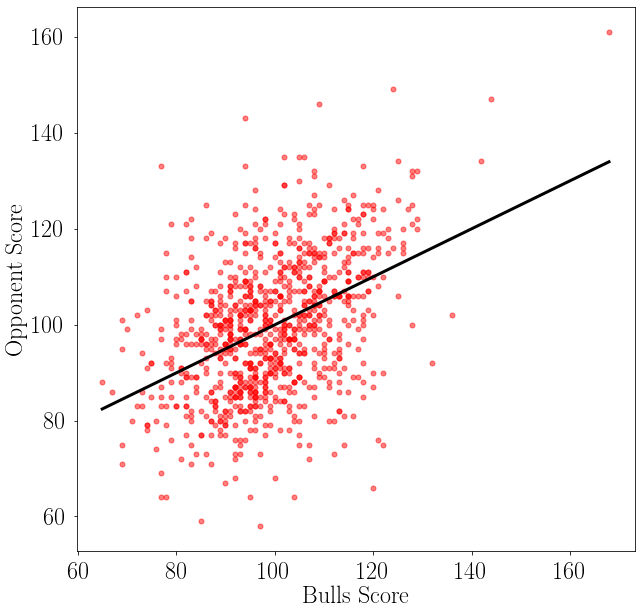

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import stats


slope, intercept, r_value, p_value, std_err = stats.linregress(bulls_points,opponent_b_points)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)



plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8




plt.xlabel('Bulls Score')
plt.ylabel('Opponent Score')


plt.plot(bulls_points,opponent_b_points,marker='o', color ='red', markersize=5, alpha=0.5, linewidth=0)

best_fit_x = np.arange(min(bulls_points), max(bulls_points), (max(bulls_points) - min(bulls_points)) / 1000.0)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='black', markersize=0, linewidth=3, linestyle='-', alpha = 1.0)



plt.show()

# Description: 
We can see the positive correlation between bulls score and opponent score and this scatter plot shows that when bulls' scores are higher,
their opponents' scores are higher as well

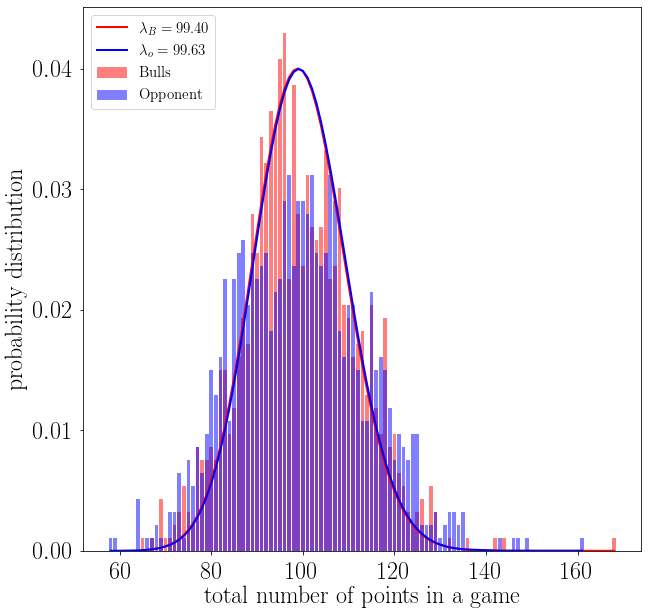

In [23]:
from scipy.stats import poisson
def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance

pdf_h, av_h, var_h = measure_probability_distribution (bulls_points)
pdf_v, av_v, var_v = measure_probability_distribution (opponent_b_points)






plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('total number of points in a game')
plt.ylabel('probability distribution')


x = []
Px = []
for q in pdf_h:
    x.append(q)
    Px.append(pdf_h[q])
    

plt.bar(x, Px, color = 'red', align='center', alpha=0.5, label = 'Bulls')
plt.plot(sorted(x), poisson.pmf(sorted(x), av_h), linestyle='-', linewidth=2.0, color='red', label = '$\lambda_{B} = '+'%.2f' % av_h+'$')





x = []
Px = []
for q in pdf_v:
    x.append(q)
    Px.append(pdf_v[q])
    

plt.bar(x, Px, color = 'blue', align='center', alpha=0.5, label = 'Opponent')
plt.plot(sorted(x), poisson.pmf(sorted(x), av_v), linestyle='-', linewidth=2.0, color='blue', label = '$\lambda_{o} = '+'%.2f' % av_v+'$')


plt.legend(loc=2, numpoints=1, prop={'size':15})

plt.show()

# Description:
The distributions are well fitted by Poisson distributions. On average, Bulls score around 99.4 points per game, while their opponents have scored 99.64 points per game since 2010